# Imports and Constants

In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os

In [4]:
ASSETS_DIR = 'assets'
IMAGES_DIR = os.path.join(ASSETS_DIR, 'images')
SUN_IMG_PATH = os.path.join(IMAGES_DIR, 'The_Sun_in_high_resolution_pillars.jpg')
MOON_IMG_PATH = os.path.join(IMAGES_DIR, 'FullMoon2010.jpg')

# Reading and Displaying the Images

In [6]:
sun_img = cv2.imread(SUN_IMG_PATH)
moon_img = cv2.imread(MOON_IMG_PATH)

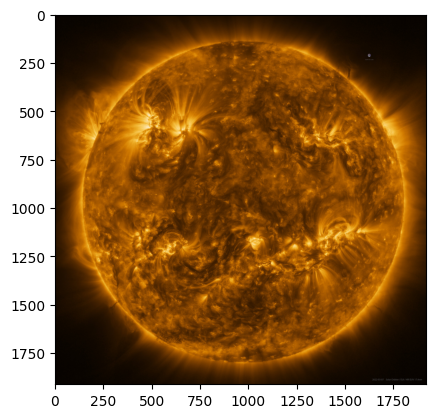

In [96]:
sun_img_RGB = cv2.cvtColor(sun_img, cv2.COLOR_BGR2RGB)

In [ ]:
plt.imshow(sun_img_RGB)

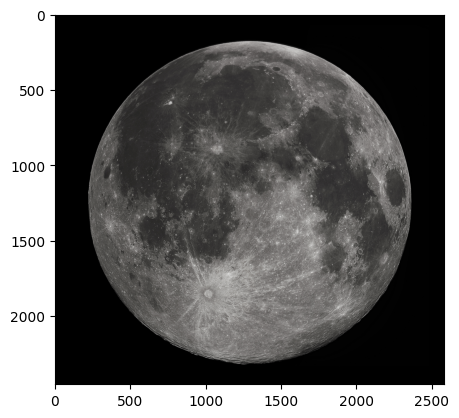

In [8]:
moon_img_RGB = cv2.cvtColor(moon_img, cv2.COLOR_BGR2RGB)

In [ ]:
plt.imshow(moon_img_RGB)

# Addition Operation

In [9]:
sun_img_RGB.shape, moon_img_RGB.shape

((1912, 1920, 3), (2452, 2580, 3))

In [10]:
# throws an error since both operand images must have the same height and width

# added_imgs = cv2.add(sun_img_RGB, moon_img_RGB)

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:650: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'cv::arithm_op'


## Reshaping the Images

The moon image's new shape: (1912, 1920, 3)


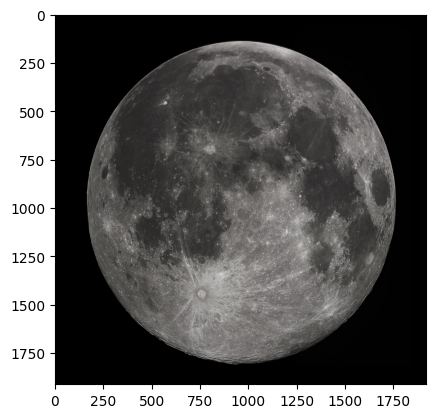

In [42]:
resized_moon_img_RGB = cv2.resize(moon_img_RGB, (1920, 1912))
print('The moon image\'s new shape:', resized_moon_img_RGB.shape)

In [ ]:
plt.imshow(resized_moon_img_RGB)

In [58]:
added_imgs = cv2.add(sun_img_RGB, resized_moon_img_RGB)

In [59]:
print('sun_img_RGB[0][0]:', sun_img_RGB[0][0])
print('resized_moon_img_RGB[0][0]:', resized_moon_img_RGB[0][0])
print('added_imgs[0][0]:', added_imgs[0][0])
# it is an pixel-wise, element-wise **saturated** addition, hence the need for equal operand shapes 

sun_img_RGB[0][0]: [8 3 0]
resized_moon_img_RGB[0][0]: [0 0 0]
added_imgs[0][0]: [8 3 0]


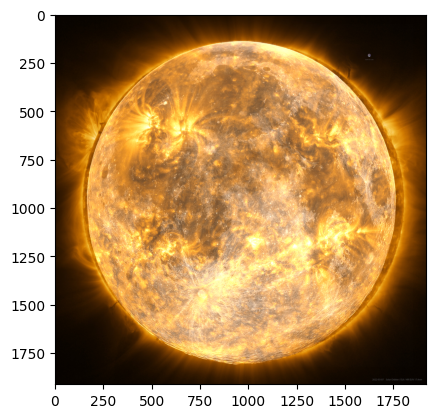

In [60]:
plt.imshow(added_imgs) # we get a blend of the 2 images

## Weighed Addition Operation

In [55]:
weighted_addition_result = cv2.addWeighted(sun_img_RGB, 0.5, resized_moon_img_RGB, 1.0, 0) 
# the last arg is the gamma value

In [56]:
print('sun_img_RGB[0][0]:', sun_img_RGB[0][0])
print('resized_moon_img_RGB[0][0]:', resized_moon_img_RGB[0][0])
print('weighted_addition_result[0][0]:', weighted_addition_result[0][0])

sun_img_RGB[0][0]: [8 3 0]
resized_moon_img_RGB[0][0]: [0 0 0]
weighted_addition_result[0][0]: [4 2 0]


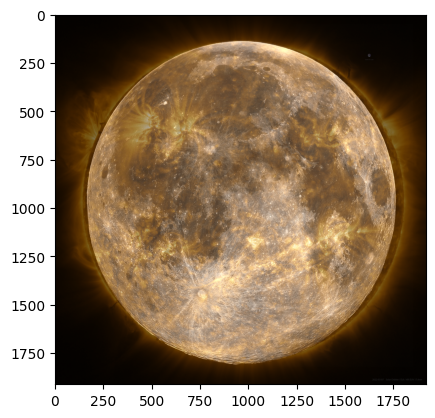

In [57]:
plt.imshow(weighted_addition_result) # more weight to the moon img

In [54]:
gamma_experiment = cv2.addWeighted(sun_img_RGB, 0.5, resized_moon_img_RGB, 1.0, 0)

In [ ]:
gamma_experiment[0][0] # gamma=0 doesn't affect typical weighted addition of images

In [32]:
weighted_addition_result = cv2.addWeighted(sun_img_RGB, 0.5, resized_moon_img_RGB, 1.0, 100)

In [27]:
weighted_addition_result[0][0] # each of the pixel values is increased by a 100 (the gamma valu set in cv2.addWeighted) 

array([104, 102, 100], dtype=uint8)

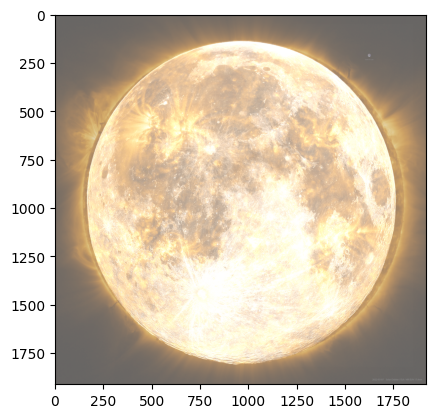

In [33]:
plt.imshow(weighted_addition_result) # the picture is brighter

In [41]:
weighted_addition_result = cv2.addWeighted(sun_img_RGB, 0.5, resized_moon_img_RGB, 1.0, -50)
# negqtive gamma value

In [30]:
weighted_addition_result[0][0] # in this case the negative value is also added (the absolute value is subtracted)
# most importantly this addition / subtraction is saturated in the interval [0, 255]

array([0, 0, 0], dtype=uint8)

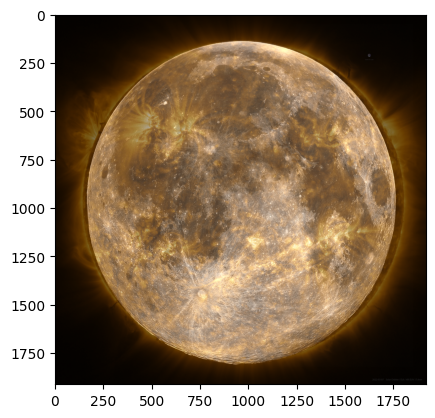

In [39]:
plt.imshow(weighted_addition_result) # the picture is dimmer / darker

# Subtraction Operation

In [64]:
# As with the addition operation, subtraction reauires both operand images to have equal sizes
sun_minus_moon = cv2.subtract(sun_img_RGB, resized_moon_img_RGB)

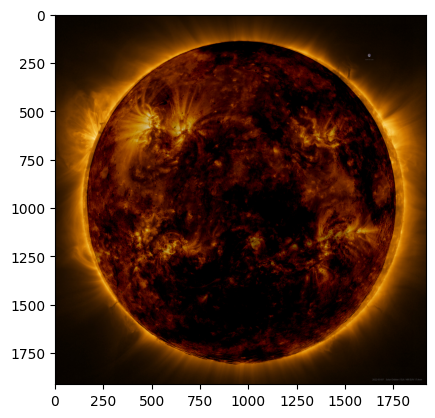

In [66]:
plt.imshow(sun_minus_moon)

In [63]:
moon_minus_sun = cv2.subtract(resized_moon_img_RGB, sun_img_RGB)

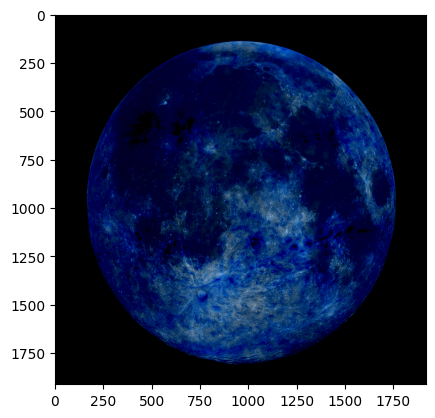

In [62]:
plt.imshow(moon_minus_sun)
# In the background of the moon image is every pixel [0, 0, 0] 
# thus the background remains unchanged thanks to the saturation

# Zooming In / Working with a Region of Interest

In [74]:
# R.O.I. stands for Region Of Interest
ROI_HEIGHT_START = 100
ROI_HEIGHT_END = 1850

ROI_WIDTH_START = 120
ROI_WIDTH_END = 1800

In [77]:
roi_img_moon = resized_moon_img_RGB[ROI_HEIGHT_START:ROI_HEIGHT_END, ROI_WIDTH_START:ROI_WIDTH_END]
# same as resized_moon_img_RGB[ROI_HEIGHT_START:ROI_HEIGHT_END, ROI_WIDTH_START:ROI_WIDTH_END, :] => extra , :

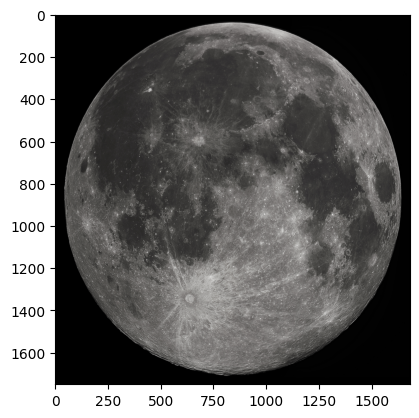

In [78]:
plt.imshow(roi_img_moon)

In [81]:
moon_crater = resized_moon_img_RGB[1250:1500, 550:800]

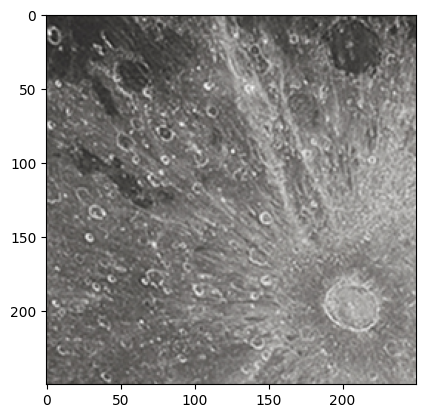

In [82]:
plt.imshow(moon_crater)

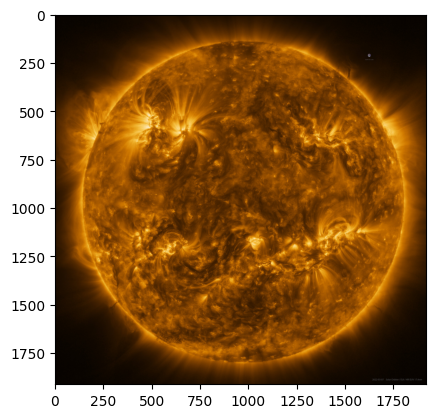

In [83]:
plt.imshow(sun_img_RGB)

In [147]:
moon_crater_slot = sun_img_RGB[750:1000, 1000:1250]

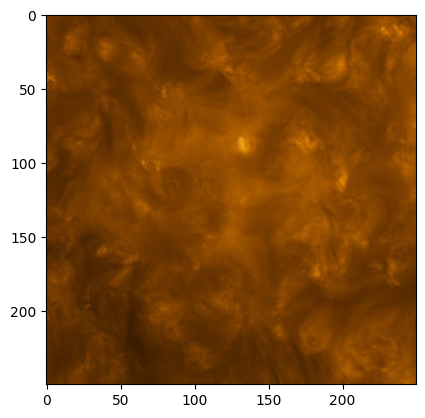

In [148]:
plt.imshow(moon_crater_slot)

In [149]:
mesh_moon_crater_sun = cv2.addWeighted(moon_crater_slot, 1.25, moon_crater, 1.0, -110)

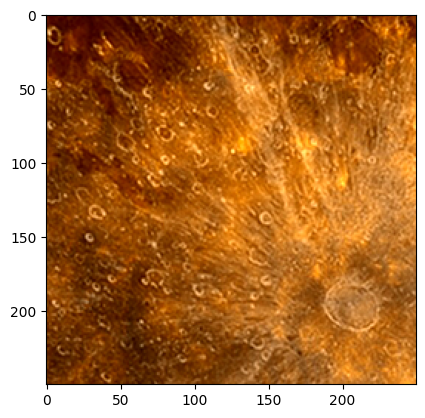

In [150]:
plt.imshow(mesh_moon_crater_sun)

In [151]:
sun_img_RGB[750:1000, 1000:1250] = mesh_moon_crater_sun

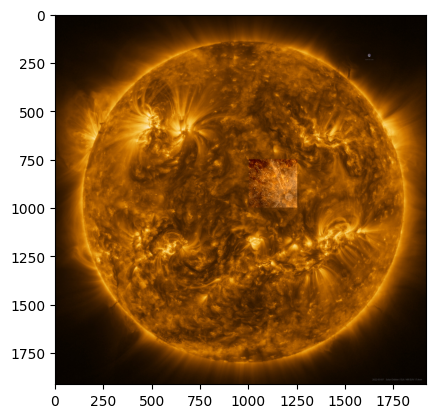

In [152]:
plt.imshow(sun_img_RGB) # how to make it smoothly put into the image?